In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Processing and EDA

In [55]:
#read in data
all_fund = pd.read_csv('all_companies_fund.csv') #2000-2019
all_bank = pd.read_csv('all_bankruptcies.csv', encoding = "ISO-8859-1") #2000-2019

C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,33,37,955,956,957,962,972,976,977,982) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (263,341) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#keys to join all databases
key_table = all_fund[['cik', 'GVKEY']] 
key_table = key_table.drop_duplicates()
key_table.head()

,cik,GVKEY
0,1750.0,1004
19,910627.0,1010
23,61478.0,1013
34,2668.0,1019
36,319126.0,1021


## Bankruptcy Data EDA

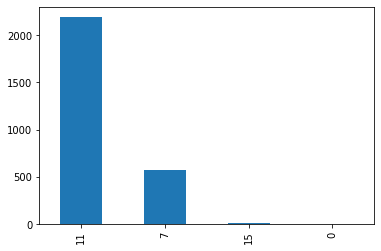

In [5]:
all_bank['BANKRUPTCY_TYPE'].value_counts().plot(kind = 'bar')

In [58]:
#extract useful information
all_bank = all_bank[['BANKRUPTCY_TYPE', 'BANK_BEGIN_DATE', 'SIC_CODE_FKEY', 'SIC_CODE_DESCRIP', 'NAICS_CODE_DESCRIP', 'NAICS_CODE_FKEY', 'SHORT_NAME', 'NAME', 'COMPANY_FKEY']]

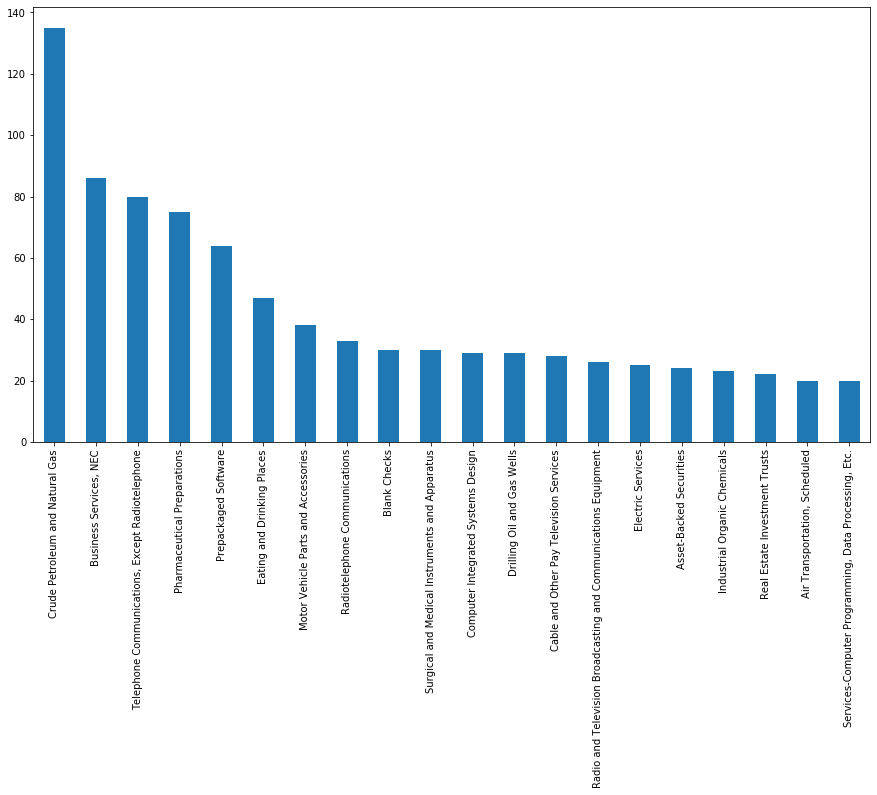

In [9]:
#top 20 industries with most bankruptcies using SIC code

all_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

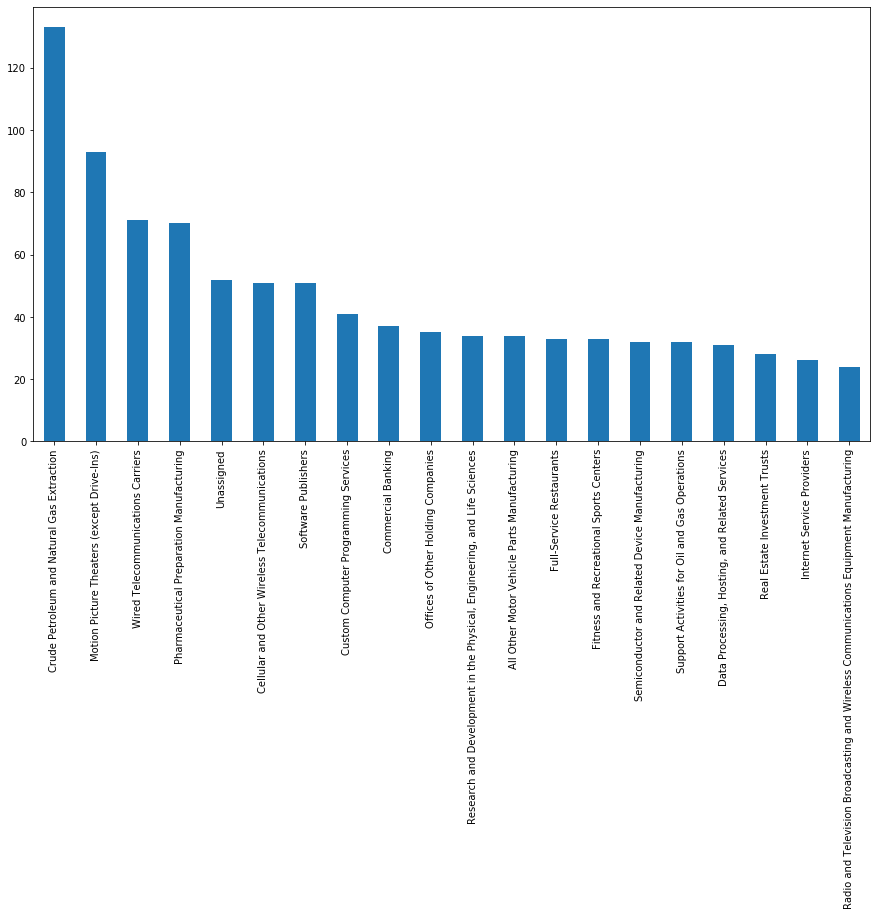

In [10]:
#top 20 industries with most bankruptcies using NICS code

all_bank['NAICS_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

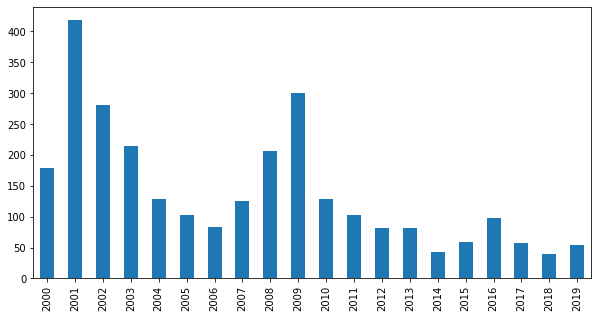

In [14]:
all_bank['year'] = pd.to_datetime(all_bank['BANK_BEGIN_DATE']).dt.year
all_bank['year'].value_counts().sort_index().plot(kind = 'bar', figsize = (10,5))

In [15]:
# gvkey_list = str(list(all_fund['GVKEY'].unique())).strip('\'').strip('[').strip(']').split(', ')

# # Write to txt file to look up relevant companies in Audit Analytics database
# # file = open('all_GVKEY.txt','w')
# # for i in all_fund['GVKEY']:
# #     file.write(str(i))
# #     file.write('\n')
# # file.close()

print(all_fund['GVKEY'].nunique(), 'of unique GVKEYs')
print(all_fund['cik'].nunique(), 'of unique ciks')
print('cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped')

24933 of unique GVKEYs
17998 of unique ciks
cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped


In [39]:
# all_bank.groupby(['year', 'NAICS_CODE_DESCRIP'])[['NAICS_CODE_DESCRIP']].count().unstack().to_csv('industrybank.csv')

In [44]:
# all_bank.groupby(['year', 'SIC_CODE_DESCRIP'])[['NAICS_CODE_DESCRIP']].count().unstack().to_csv('sicbank.csv')

In [35]:
all_bank.shape

(2779, 9)

In [69]:
f_keys = list(all_bank['COMPANY_FKEY'])

In [68]:
ciks = list(key_table['cik'])

In [78]:
#test how many bankrupt Fkeys are in fundamental
x = [] 
for i in f_keys:
    
    if i in ciks:
        continue
    
    else:
        x.append(i)
        print (i, 'not in fundamental')

3662 not in fundamental
3941 not in fundamental
4707 not in fundamental
5588 not in fundamental
6948 not in fundamental
8109 not in fundamental
12105 not in fundamental
13156 not in fundamental
18530 not in fundamental
23778 not in fundamental
23778 not in fundamental
27960 not in fundamental
28761 not in fundamental
30419 not in fundamental
30419 not in fundamental
34879 not in fundamental
40730 not in fundamental
43960 not in fundamental
45791 not in fundamental
46601 not in fundamental
47968 not in fundamental
53453 not in fundamental
56824 not in fundamental
57201 not in fundamental
59401 not in fundamental
60064 not in fundamental
60064 not in fundamental
65202 not in fundamental
67199 not in fundamental
70412 not in fundamental
72655 not in fundamental
75234 not in fundamental
76741 not in fundamental
79839 not in fundamental
82925 not in fundamental
87888 not in fundamental
94026 not in fundamental
94601 not in fundamental
96294 not in fundamental
97579 not in fundamental
99321 

1068052 not in fundamental
1068078 not in fundamental
1068660 not in fundamental
1068874 not in fundamental
1069003 not in fundamental
1070313 not in fundamental
1070510 not in fundamental
1070669 not in fundamental
1071411 not in fundamental
1071645 not in fundamental
1072229 not in fundamental
1072342 not in fundamental
1073091 not in fundamental
1073715 not in fundamental
1074457 not in fundamental
1074663 not in fundamental
1075043 not in fundamental
1076647 not in fundamental
1076700 not in fundamental
1077030 not in fundamental
1077597 not in fundamental
1078006 not in fundamental
1078392 not in fundamental
1078420 not in fundamental
1078547 not in fundamental
1078593 not in fundamental
1078706 not in fundamental
1079250 not in fundamental
1079791 not in fundamental
1080504 not in fundamental
1080558 not in fundamental
1081074 not in fundamental
1081192 not in fundamental
1081748 not in fundamental
1081938 not in fundamental
1082129 not in fundamental
1082292 not in fundamental
1

1366913 not in fundamental
1367387 not in fundamental
1368147 not in fundamental
1368154 not in fundamental
1368154 not in fundamental
1368218 not in fundamental
1369233 not in fundamental
1370512 not in fundamental
1372175 not in fundamental
1374835 not in fundamental
1374985 not in fundamental
1375083 not in fundamental
1375424 not in fundamental
1376502 not in fundamental
1376912 not in fundamental
1378670 not in fundamental
1379763 not in fundamental
1379926 not in fundamental
1382056 not in fundamental
1382805 not in fundamental
1385542 not in fundamental
1386026 not in fundamental
1386927 not in fundamental
1387156 not in fundamental
1387371 not in fundamental
1389053 not in fundamental
1390630 not in fundamental
1393614 not in fundamental
1395864 not in fundamental
1396426 not in fundamental
1397346 not in fundamental
1397396 not in fundamental
1398201 not in fundamental
1399311 not in fundamental
1399541 not in fundamental
1399542 not in fundamental
1400122 not in fundamental
1

In [89]:
print('Of', len(f_keys), 'bankrupt companies,', len(x), 'companies are not in fundamental dataset')

Of 2779 bankrupt companies, 1085 companies are not in fundamental dataset


In [90]:
# # gvkey_list = str(list(all_fund['GVKEY'].unique())).strip('\'').strip('[').strip(']').split(', ')

# # Write to txt file to look up relevant companies in Audit Analytics database
# file = open('all_fkey.txt','w')
# for i in all_bank['COMPANY_FKEY']:
#     file.write(str(i))
#     file.write('\n')
# file.close()

In [96]:
#used bankruptcy Fkey to query fundamental data, turns out a lot of ciks do not return fundamental data
fund_bank = pd.read_csv('fund_bank.csv')
fund_bank['cik'].nunique()

1798

In [98]:
print('will move forward with the companies with fundamental data')
print('might be benefitial to figure out why so many companies do not have fundamental data')

will move forward with the companies with fundamental data
might be benefitial to figure out why so many companies do not have fundamental data


## Merge fundamental and bankruptcy and financial ratios


In [105]:
fund_bank = pd.merge(all_fund, all_bank, left_on = 'cik', right_on = 'COMPANY_FKEY', suffixes = ('_fund', '_bank'), how = 'left')
fund_bank['cik'].nunique()

17998

In [107]:
bankrupt_key  = pd.merge(all_bank, key_table, left_on = 'COMPANY_FKEY', right_on = 'cik', suffixes = ('_ratio', '_key'), how = 'inner')


In [111]:
all_fin_ratios  = pd.read_csv('all_fin_ratios.csv')

In [140]:
#only keep year end financial ratios for each company
all_fin_ratios=all_fin_ratios.drop_duplicates(subset=['gvkey','qdate'], keep='last')
all_fin_ratios['qmonth']=pd.to_datetime(all_fin_ratios['qdate']).dt.month
mask= all_fin_ratios['qmonth']==12
all_fin_ratios= all_fin_ratios[mask]

all_fin_ratios.shape

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(75263, 76)

In [141]:
fin_gv = list(all_fin_ratios['gvkey'].unique())

fund_gv = list(all_fund['GVKEY'].unique())

#test how many bankrupt Fkeys are in fundamental
x = [] 
for i in fin_gv:
    
    if i in fund_gv:
        continue
    
    else:
        x.append(i)
        print (i, 'not in fundamental')

1411 not in fundamental
1542 not in fundamental
3391 not in fundamental
4806 not in fundamental
5181 not in fundamental
6282 not in fundamental
7503 not in fundamental
7837 not in fundamental
8248 not in fundamental
11768 not in fundamental
13486 not in fundamental
14825 not in fundamental
17164 not in fundamental
17560 not in fundamental
18693 not in fundamental
18769 not in fundamental
18914 not in fundamental
22525 not in fundamental
23692 not in fundamental
24779 not in fundamental
25271 not in fundamental
29402 not in fundamental
29982 not in fundamental
30240 not in fundamental
30599 not in fundamental
30757 not in fundamental
30764 not in fundamental
31097 not in fundamental
61606 not in fundamental
62004 not in fundamental
62069 not in fundamental
62338 not in fundamental
62450 not in fundamental
62513 not in fundamental
63207 not in fundamental
64509 not in fundamental
64996 not in fundamental
65629 not in fundamental
65667 not in fundamental
65882 not in fundamental
65936 not

122149 not in fundamental
122354 not in fundamental
122378 not in fundamental
122517 not in fundamental
122742 not in fundamental
122835 not in fundamental
122837 not in fundamental
122894 not in fundamental
122919 not in fundamental
123134 not in fundamental
124015 not in fundamental
124035 not in fundamental
124177 not in fundamental
124377 not in fundamental
124679 not in fundamental
124681 not in fundamental
125598 not in fundamental
126005 not in fundamental
126414 not in fundamental
126420 not in fundamental
126459 not in fundamental
126616 not in fundamental
127175 not in fundamental
127275 not in fundamental
127382 not in fundamental
127399 not in fundamental
127414 not in fundamental
127486 not in fundamental
129083 not in fundamental
130303 not in fundamental
153351 not in fundamental
10978 not in fundamental
23622 not in fundamental
29357 not in fundamental
31152 not in fundamental
3078 not in fundamental
30031 not in fundamental
6285 not in fundamental
189546 not in fundame

In [142]:
print('Of', len(fin_gv), 'companies with financial ratios', len(x), 'companies are not in fundamental dataset')

Of 9466 companies with financial ratios 560 companies are not in fundamental dataset


In [143]:
fin_ratio_bankruptcy = pd.merge(all_fin_ratios, bankrupt_key, left_on = 'gvkey', right_on = 'GVKEY', suffixes = ('_finratio', '_bankrupt'), how = 'left')


In [145]:
mask = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year + 1 == pd.to_datetime(fin_ratio_bankruptcy['BANK_BEGIN_DATE']).dt.year

fin_ratio_bankruptcy['bankrupted'] = np.where(mask, 1,0)

In [147]:
#might want to check why so few bankruptcies exist in this final merge dataset
fin_ratio_bankruptcy['bankrupted'].sum()

518

In [151]:
fin_ratio_bankruptcy['year'] = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year
all_fund['year'] =  pd.to_datetime(all_fund['datadate']).dt.year


In [152]:
fund_ratio_bank  = pd.merge(all_fund, fin_ratio_bankruptcy, left_on = ['GVKEY', 'year'], right_on = ['gvkey', 'year'], suffixes = ('_fund', '_ratio'), how = 'inner')
fund_ratio_bank = fund_ratio_bank.drop(columns = 'GVKEY_ratio')
fund_ratio_bank = fund_ratio_bank.rename(columns = {'GVKEY_fund' : 'GVKEY'})

In [157]:
print('The final dataset includes:',fund_ratio_bank['GVKEY'].nunique(), 'companies, which have fundamental as well as financial ratios values, and', fund_ratio_bank['bankrupted'].sum(), 'bankruptcies')

The final dataset includes: 8673 companies, which have fundamental as well as financial ratios values, and 511 bankruptcies


## Final EDA

In [159]:
#filter for market cap size (in MM)
#recommend using this after creating bankruptcy dummy

def market_cap_size(df, lower, upper):
    
    mask = ((df['mkvalt'] >=lower) & (df['mkvalt'] <=upper))
    df =df[mask]
    
    return df


# #market cap 500M - 1B
# df500 = market_cap_size(fund_ratio_bank, 0,1000)

# df500['GVKEY'].nunique()

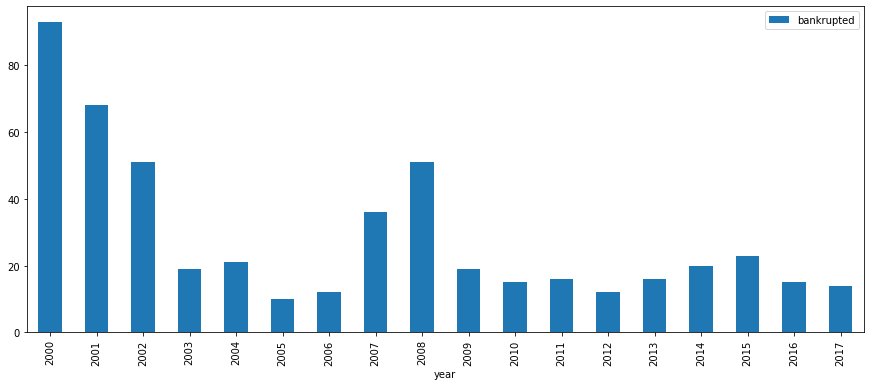

In [163]:
fund_ratio_bank.groupby('year')[['bankrupted']].sum().plot(kind = 'bar', figsize = (15,6))

In [167]:
final_bank = fund_ratio_bank [fund_ratio_bank['bankrupted']==1]

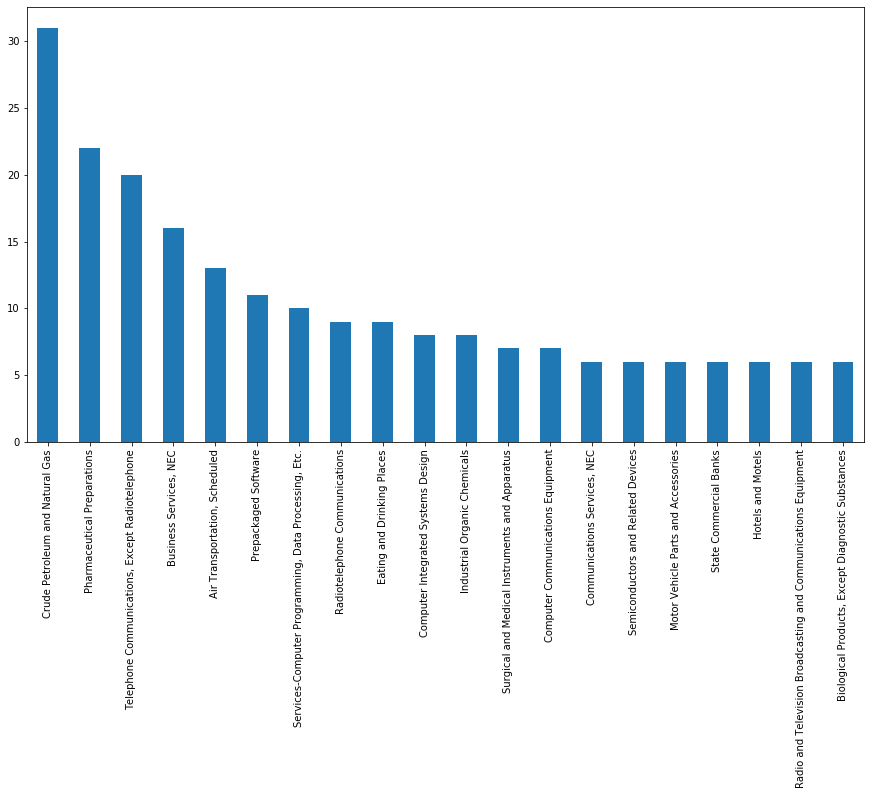

In [168]:
final_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

most bankrptcies happened with companies with small market caps


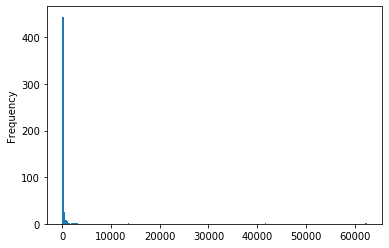

In [191]:
#bankrupt companies usually have small market caps
final_bank['mkvalt'].plot(kind = 'hist', bins = 200)#.value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))
print('most bankrptcies happened with companies with small market caps')

## Next steps:
1. figure out why so many bankrupted companies do not have fundamental data (is it how the database was constructed? fundamental dataset would get rid of bankrupted or acquired companies?)

2. figure out why only 500 or so bankruptcies exist in the final dataset, down from 1000 (bankrupt companies with fundamental data) --> hypothesis is some fin ratios companies do not have fundamental data and those happen to be the ones with bankrupt data. Need to check 

3. model development. Note that the current dataset includes data from 2000 - 2019. Need to filter out dates
